### Neural Networks

 - Basically a set of inter-connected nodes or neurons or perceptrons.
     - Typically consists of layers of such neurons.
     - Each neuron in a given layer is connected to all the neurons of the previous layers through a weight and an activatio function.
     - Activation function is used to generate the non-linearity in the model that is to be trained with the data in hand.
 Let us first consider how a single layer neural network would look like. For our purposes let's consider our input to be a three dimensional vector. For example let's say we are monitoring the Pressure, temperature and humidity at a weather station. the vector is $\vec{V}=\left(P, T, H\right)$. We would also need the label or the output. In this case this can be the chances of rain, $R$.

<img src="images/linearneuralnetwork.PNG" width="500" height="250">


$R'$ is the output of the untrained linear neural net and is given by:

\begin{equation}
R'=1\times w_0+P\times w_1+T\times w_2+H\times w_3
\end{equation}

The difference between the output of the untrained model, $R'$ and the actual value $R$, a function of the difference $\Delta=f\left(R-R'\right)$, known as the loss or the cost function is used to optimize the weights $w_i$ using optimization methods such as Gradient Descent. Note that we have a node to denote the offset whose input is always $1$ (weight given by $w_0$). As a rule of thumb, in the final representation and as well counting the number of neurons in each layer the node denoting the offset is mostly omitted. In the above example the neural network has single layer with three neurons. 

### Training a linear model using a  neural network

- We will try to first model a simple linear equation using a single layer neural network.
    - $y=3x+5$
    - The neural net model would look like $y'= w_0+w_1x$
    
We will first simulate some of the data:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x = np.arange(0, 5, 0.5)

In [3]:
y = 3*x+5 #+ .001*np.random.randn(len(x))

Text(0, 0.5, 'y')

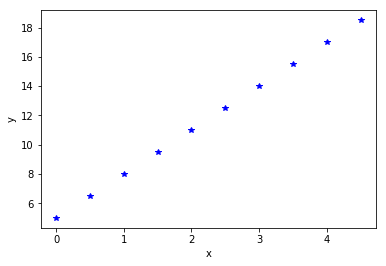

In [4]:
plt.plot(x, y, 'b*')
plt.xlabel('x')
plt.ylabel('y')

In [5]:
x = np.float32(x.reshape(-1, 1))
y = np.float32(y.reshape(-1, 1))

In [6]:
#Importing torch
import torch
import torch.nn as nn
from torch.autograd import Variable

In [7]:
#Create a class for the training
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.input_dim = input_size
        self.output_dim = output_size
        self.linear = nn.Linear(self.input_dim, self.output_dim)
    def forward(self, x):
        output = self.linear(x)
        return output

In [8]:
#Instantiate the model
input_dim = 1
output_dim = 1

model = LinearRegression(input_dim, output_dim)

What else is required?

- A loss function, in order to compare the output of the neural network to the real life value (in our case simulated y)
- A simple loss function would be the mean squared error:
    - $MSE = \frac{1}{n}\Sigma_i\left(\hat{y}_i-y_i\right)^2$
        - $\hat{y}_i$: predicted value
        - $y_i$: true value

In [9]:
#Define the loss function
criterion = nn.MSELoss(reduction='mean')

However learning still needs to takes place. The learning takes place by feeding back the loss function to the parameters in such a way that the loss function is minimized. 

- $\theta := \theta - \eta.\nabla_{\theta}$, where 
    - $\theta$ represents the parameters, 
    - $\eta$ is the learning rate
    - $\nabla_{\theta}$ is the gradient of the loss function w.r.t. $\theta$
- What are the parameters in this case?
    - $\alpha$ and $\beta$ in $y=\alpha x + \beta$
    - After successful learning we should obtain: $\alpha=3$, $\beta=5$

In [10]:
#Define learning rate
lr = 0.1
#Define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=lr)

Now it is time to train. A few points before training:

- Generally once has to go through the dataset several time in order to properly optimize the weights, we fix the number of 'epochs' initially
- Since the inputs will generally be numpy array we have to convert them into torch tensors first.
- While going through each epoch, we compute the outputs and obtain the loss.
- The loss is then used to compute the gradients which will be used to update the parameters

In [11]:
nb_epoch = 100

In [12]:
epoch=0
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(x))
    labels = Variable(torch.from_numpy(y))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    print('Epoch {},  Loss: {}'.format(epoch, loss.data))

Epoch 1,  Loss: 188.68670654296875
Epoch 2,  Loss: 63.560482025146484
Epoch 3,  Loss: 22.36962127685547
Epoch 4,  Loss: 8.710518836975098
Epoch 5,  Loss: 4.092309474945068
Epoch 6,  Loss: 2.4520766735076904
Epoch 7,  Loss: 1.8009326457977295
Epoch 8,  Loss: 1.4856059551239014
Epoch 9,  Loss: 1.2907707691192627
Epoch 10,  Loss: 1.1447780132293701
Epoch 11,  Loss: 1.0231863260269165
Epoch 12,  Loss: 0.917127251625061
Epoch 13,  Loss: 0.8229238986968994
Epoch 14,  Loss: 0.7386798858642578
Epoch 15,  Loss: 0.6631527543067932
Epoch 16,  Loss: 0.5953789949417114
Epoch 17,  Loss: 0.5345410704612732
Epoch 18,  Loss: 0.479922890663147
Epoch 19,  Loss: 0.4308871328830719
Epoch 20,  Loss: 0.3868613541126251
Epoch 21,  Loss: 0.3473344147205353
Epoch 22,  Loss: 0.311845988035202
Epoch 23,  Loss: 0.27998316287994385
Epoch 24,  Loss: 0.25137656927108765
Epoch 25,  Loss: 0.22569242119789124
Epoch 26,  Loss: 0.20263256132602692
Epoch 27,  Loss: 0.181928813457489
Epoch 28,  Loss: 0.16334056854248047
Epo

In [13]:
list(model.parameters())

[Parameter containing:
 tensor([[3.0048]], requires_grad=True), Parameter containing:
 tensor([4.9853], requires_grad=True)]

In [14]:
with torch.no_grad():
    predicted = model.forward(inputs).data.numpy()

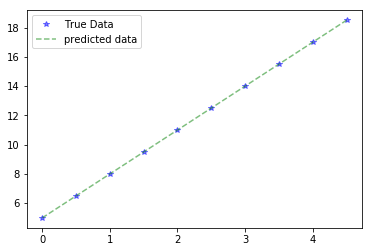

In [15]:
plt.plot(x, y, 'b*', label='True Data', alpha=0.5)
plt.plot(x, predicted, 'g--', label = 'predicted data', alpha=0.5)
plt.legend(loc='best')

### Loss 

Loss is way to estimate how much the predicted output is different from the actual value (in case of regression) and label (in case of classification). The loss is also often called cost function. 

In case of regression a common cost function would be the Mean Square Loss. Suppose we define our model as $h_{\theta}\left(x\right)$ then we define the loss function as :

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^{n} \left(h_{\theta}\left(x^i\right)-y^i\right)^2
\end{equation}
where $x^i$ are the risen incidents.



### What about non-linearity?

The above example was about linear regression and hence a linear model could easily model the sample data. However we want to be able to data that is non-linear as well. Non-linearity is introduced in Neural networks through what are known as activation function. A well known activation function is the Sigmoid function which is given by :

\begin{equation}
S(z)=\frac{1}{1+e^{-z}}=\frac{e^z}{e^z+1}
\end{equation}

If you plot the sigmoid function this is what it looks like:

In case of a classification problem, this loss function described above for the problem of regression will not give us much information. Consider the case when we consider the output of a binary classifier. The loss function used in this case is of the form:

\begin{equation}
J\left(\theta\right) = \sum_{i=1}^n\left[y^ilogh\left(x^i\right)+\left(1-y^i\right)log\left(i-h\left(x^i\right)\right)\right]
\end{equation}


In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

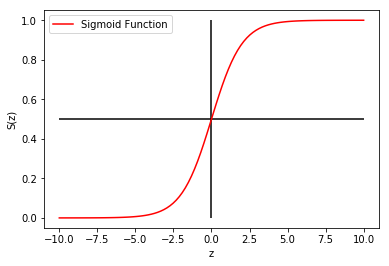

In [17]:
z = np.linspace(-10, 10, num=100 )
plt.plot(z, sigmoid(z), 'r-', label='Sigmoid Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('S(z)')
plt.hlines(y=0.5, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=1)

#### ReLU activation
There are a few other popular activation functions as well. A particularly popular one is the ReLU (Rectified Linear Unit ) activation which looks like:

\begin{equation}
R\left(x\right) = max(x, 0)
\end{equation}

In [18]:
def relu(x):
    return max(x,0.0)

In [19]:
relu_vec = np.vectorize(relu)

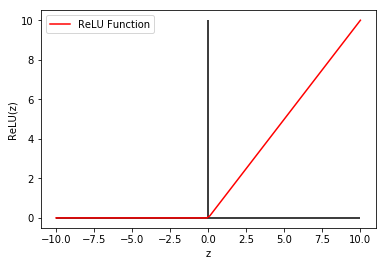

In [20]:
z = np.linspace(-10, 10, num=100)
plt.plot(z, relu_vec(z), 'r-', label='ReLU Function')
plt.legend(loc='best')
plt.xlabel('z')
plt.ylabel('ReLU(z)')
plt.hlines(y=0, xmin=-10, xmax=10)
plt.vlines(x=0, ymin=0, ymax=10)

In order to enable non-linearity in our models we apply activation function to each node or neuron of a layer.

<img src="images/linearneuralnetworkplusactivation.PNG" width="500" height="250">

In the above diagram we see the activation function applied to the final layer which has a single neuron in it. In general, activation functions are applied to all the neurons in each layer, with each neuron being applied an activation function. 

In order to maximize the effectiveness of neural network we need to add more layers of network. This combined with the activation function will allow us to model complex data which has non-trivial relationship between the features and the labels:

<img src="images/multilayerneuralnet.png" width="500" height="250">

#### Softmax activation
The softmax activation function is another highly popular activation function which is usually used in the final layer when doing multiclass-classification using neural networks. Suppose we want to apply softmax to the output of a neural network classfier trying to classify 10 types of images with classes $k=1,2..10$. The output layer would thus have 10 layers. The softmax activated output for the i$^{th}$ neuron of the final layer would be thus given by 


\begin{equation}
P\left(y=2|x\right) = \frac{e^{x^Tw_j}}{\Sigma_k e^{x^Tw_k}}
\end{equation}

#### Backpropagation

As we can see that a neural network can very complicated and perform parameter updates (here the weight $w_{ij}$), we will need to compute the gradient at each node. This is known as backpropagation as the error obtained by comparing the output with the actual value using a loss function is then used to compute the gradients of the parameters. 

#### Basic classfication using Neural Networks

Let us try some basic classification using neural networks. For this purposes I will use a very popular dataset, the breast cancer diagnostics dataset origically sourced from the University of Wisconsin.

In [21]:
from sklearn.datasets import load_breast_cancer

In [22]:
data = load_breast_cancer()

In [23]:
df = pd.DataFrame(data=data.data, columns=list(data.feature_names))

In [24]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Before we start modeling, we need to split the data into training and test sets in order to have an independent verification of our model. This functionality available in the sklearn package.

In [25]:
X = np.float32(data.data)
y = np.float32(data.target).reshape(-1, 1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
y.shape

(569, 1)

In [27]:
import torch.nn.functional as F

In [29]:
#Create a class for the training
class Classification(nn.Module):
    def __init__(self):
        """
        Artificial Deep Neural Net:
        Input Layer : 30 , as there are 30 features
        Hidden Layer 1: 60
        Hidden Layer 2: 120
        Hidden Layer 3: 60
        Hidden Layer 4: 10
        Output Layer : 1, since the output is either 0 or 1
        """
        super().__init__()
        self.linear1 = nn.Linear(30, 60)
        self.dropout1 = nn.Dropout(p=0.1)
        self.linear2 = nn.Linear(60, 120)
        self.dropout2 = nn.Dropout(p=0.1)
        self.linear3 = nn.Linear(120, 60)
        self.dropout3 = nn.Dropout(p=0.1)
        self.linear4 = nn.Linear(60, 10)
        self.dropout4 = nn.Dropout(p=0.1)
        self.linear5 = nn.Linear(10, 1)
    def forward(self, x):
        output = F.relu(self.linear1(x))
        output = self.dropout1(output)
        output = F.relu(self.linear2(output))
        output = self.dropout2(output)
        output = F.relu(self.linear3(output))
        output = self.dropout3(output)
        output = F.relu(self.linear4(output))
        output = self.dropout4(output)
        output = torch.sigmoid(self.linear5(output))
        return output

In [30]:
#Initializing the model
model = Classification()
#Setting the loss 
criterion = nn.BCELoss()
#Define learning rate
lr = 0.001
#Define the optimizer
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [31]:
from sklearn.metrics import roc_auc_score, accuracy_score
nb_epoch = 1000
for epoch in range(nb_epoch):
    epoch+=1
    #Convert the numpy array to torch tensor
    inputs = Variable(torch.from_numpy(X_train))
    labels = Variable(torch.from_numpy(y_train))
    
    #Clear the gradients
    optimizer.zero_grad()
    
    #Compute the output using forward pass
    outputs = model.forward(inputs)
#     print(outputs)
    
    #Compute the loss
    loss = criterion(outputs, labels)
    
    #get the Gradient
    loss.backward()
    
    #Update the parameters
    optimizer.step()
    
    with torch.no_grad():
        prob = model.forward(inputs)
        y_pred = prob.numpy()
        y_pred = (y_pred>0.6)
        score = roc_auc_score(labels, prob)
        accuracy = accuracy_score(y_train, y_pred)
    
    print('Epoch {},  ROC_AUC: {}, Accuracy: {}'.format(epoch, score, accuracy))

Epoch 1,  ROC_AUC: 0.4701452393760086, Accuracy: 0.3868131868131868
Epoch 2,  ROC_AUC: 0.7366450117929408, Accuracy: 0.3868131868131868
Epoch 3,  ROC_AUC: 0.7616584598833119, Accuracy: 0.3758241758241758
Epoch 4,  ROC_AUC: 0.7463690155997849, Accuracy: 0.3758241758241758
Epoch 5,  ROC_AUC: 0.6887904994413869, Accuracy: 0.41318681318681316
Epoch 6,  ROC_AUC: 0.6024330698886913, Accuracy: 0.4065934065934066
Epoch 7,  ROC_AUC: 0.5176066537013282, Accuracy: 0.43736263736263736
Epoch 8,  ROC_AUC: 0.42874581040261517, Accuracy: 0.4461538461538462
Epoch 9,  ROC_AUC: 0.4312699135184342, Accuracy: 0.46813186813186813
Epoch 10,  ROC_AUC: 0.46983489882898166, Accuracy: 0.4461538461538462
Epoch 11,  ROC_AUC: 0.5691438738776017, Accuracy: 0.4461538461538462
Epoch 12,  ROC_AUC: 0.5908573674845865, Accuracy: 0.4021978021978022
Epoch 13,  ROC_AUC: 0.6771320395580751, Accuracy: 0.41098901098901097
Epoch 14,  ROC_AUC: 0.6873629329250631, Accuracy: 0.3824175824175824
Epoch 15,  ROC_AUC: 0.640553233748499

Epoch 120,  ROC_AUC: 0.9607315761161914, Accuracy: 0.8857142857142857
Epoch 121,  ROC_AUC: 0.9518558364712211, Accuracy: 0.8879120879120879
Epoch 122,  ROC_AUC: 0.9607936442255969, Accuracy: 0.9164835164835164
Epoch 123,  ROC_AUC: 0.944055944055944, Accuracy: 0.8945054945054945
Epoch 124,  ROC_AUC: 0.9398766913559813, Accuracy: 0.8945054945054945
Epoch 125,  ROC_AUC: 0.9436007779203046, Accuracy: 0.8945054945054945
Epoch 126,  ROC_AUC: 0.9434766417014938, Accuracy: 0.8681318681318682
Epoch 127,  ROC_AUC: 0.9553419952828237, Accuracy: 0.8813186813186813
Epoch 128,  ROC_AUC: 0.9591384946414532, Accuracy: 0.8923076923076924
Epoch 129,  ROC_AUC: 0.9593040095998675, Accuracy: 0.9098901098901099
Epoch 130,  ROC_AUC: 0.9305457855753715, Accuracy: 0.8879120879120879
Epoch 131,  ROC_AUC: 0.9435387098108992, Accuracy: 0.8923076923076924
Epoch 132,  ROC_AUC: 0.9582074730003725, Accuracy: 0.8923076923076924
Epoch 133,  ROC_AUC: 0.9522282451276534, Accuracy: 0.8967032967032967
Epoch 134,  ROC_AUC: 

Epoch 354,  ROC_AUC: 0.9780899573798982, Accuracy: 0.9230769230769231
Epoch 355,  ROC_AUC: 0.9750693093888361, Accuracy: 0.9274725274725275
Epoch 356,  ROC_AUC: 0.9768279058219886, Accuracy: 0.9230769230769231
Epoch 357,  ROC_AUC: 0.9755037861546737, Accuracy: 0.9230769230769231
Epoch 358,  ROC_AUC: 0.9739934621591426, Accuracy: 0.9142857142857143
Epoch 359,  ROC_AUC: 0.976289982207142, Accuracy: 0.9120879120879121
Epoch 360,  ROC_AUC: 0.9711383291264949, Accuracy: 0.9230769230769231
Epoch 361,  ROC_AUC: 0.973145197997269, Accuracy: 0.9230769230769231
Epoch 362,  ROC_AUC: 0.9827036868456986, Accuracy: 0.9208791208791208
Epoch 363,  ROC_AUC: 0.9781520254893037, Accuracy: 0.9142857142857143
Epoch 364,  ROC_AUC: 0.9787933959531593, Accuracy: 0.9318681318681319
Epoch 365,  ROC_AUC: 0.9759382629205114, Accuracy: 0.9230769230769231
Epoch 366,  ROC_AUC: 0.9749037944304217, Accuracy: 0.9208791208791208
Epoch 367,  ROC_AUC: 0.9793106301982042, Accuracy: 0.9318681318681319
Epoch 368,  ROC_AUC: 0

Epoch 588,  ROC_AUC: 0.9828278230645094, Accuracy: 0.9406593406593406
Epoch 589,  ROC_AUC: 0.9862622584516075, Accuracy: 0.9274725274725275
Epoch 590,  ROC_AUC: 0.9867794926966524, Accuracy: 0.9362637362637363
Epoch 591,  ROC_AUC: 0.9879794761451566, Accuracy: 0.9560439560439561
Epoch 592,  ROC_AUC: 0.9854967517689411, Accuracy: 0.9494505494505494
Epoch 593,  ROC_AUC: 0.9877105143377333, Accuracy: 0.9494505494505494
Epoch 594,  ROC_AUC: 0.9878346505565441, Accuracy: 0.9318681318681319
Epoch 595,  ROC_AUC: 0.9884967103902015, Accuracy: 0.9362637362637363
Epoch 596,  ROC_AUC: 0.9882691273223818, Accuracy: 0.9428571428571428
Epoch 597,  ROC_AUC: 0.9837174659659866, Accuracy: 0.9318681318681319
Epoch 598,  ROC_AUC: 0.989365663921877, Accuracy: 0.9494505494505494
Epoch 599,  ROC_AUC: 0.9868415608060579, Accuracy: 0.9516483516483516
Epoch 600,  ROC_AUC: 0.9854553730293375, Accuracy: 0.9428571428571428
Epoch 601,  ROC_AUC: 0.9826002399966898, Accuracy: 0.9274725274725275
Epoch 602,  ROC_AUC: 

Epoch 822,  ROC_AUC: 0.9911242603550295, Accuracy: 0.945054945054945
Epoch 823,  ROC_AUC: 0.9940207721272809, Accuracy: 0.9516483516483516
Epoch 824,  ROC_AUC: 0.9955931642322174, Accuracy: 0.9626373626373627
Epoch 825,  ROC_AUC: 0.9934414697728307, Accuracy: 0.9494505494505494
Epoch 826,  ROC_AUC: 0.9942897339347043, Accuracy: 0.9560439560439561
Epoch 827,  ROC_AUC: 0.9955104067530103, Accuracy: 0.9714285714285714
Epoch 828,  ROC_AUC: 0.9954483386436048, Accuracy: 0.9604395604395605
Epoch 829,  ROC_AUC: 0.9927380311995696, Accuracy: 0.9560439560439561
Epoch 830,  ROC_AUC: 0.9948690362891546, Accuracy: 0.9582417582417583
Epoch 831,  ROC_AUC: 0.9935242272520379, Accuracy: 0.9582417582417583
Epoch 832,  ROC_AUC: 0.9932345760748127, Accuracy: 0.9538461538461539
Epoch 833,  ROC_AUC: 0.99493110439856, Accuracy: 0.9648351648351648
Epoch 834,  ROC_AUC: 0.9927587205693715, Accuracy: 0.9538461538461539
Epoch 835,  ROC_AUC: 0.9937931890594612, Accuracy: 0.9472527472527472
Epoch 836,  ROC_AUC: 0.

In [32]:
from sklearn.metrics import roc_curve

Let us look at the roc curve of the model especially over the test data

In [33]:
#computing the ROC curve and accuracy
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_test))
    fpr, tpr, thresholds = roc_curve(y_test, probs.numpy())
    roc_score = roc_auc_score(y_test, probs.numpy())
    

Text(0, 0.5, 'TPR')

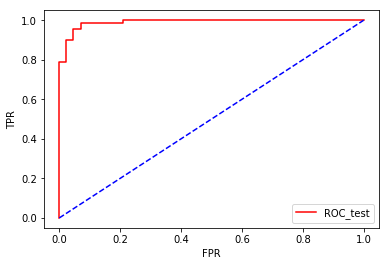

In [34]:
plt.plot(fpr, tpr, 'r-', label='ROC_test')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [35]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.9898460530625613


In [36]:
#computing the ROC curve
with torch.no_grad():
    probs = model.forward(torch.from_numpy(X_train))
    fpr, tpr, thresholds = roc_curve(y_train, probs.numpy())
    roc_score = roc_auc_score(y_train, probs.numpy())

Text(0, 0.5, 'TPR')

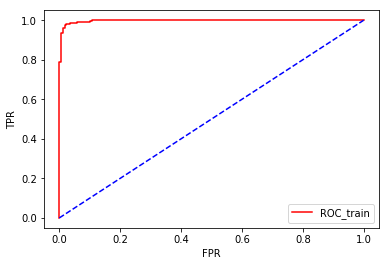

In [37]:
plt.plot(fpr, tpr, 'r-', label='ROC_train')
plt.plot([0,1], [0, 1], 'b--')
plt.legend(loc='best')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [38]:
print('The ROC_AUC score is : {}'.format(roc_score))

The ROC_AUC score is : 0.997062109488145


In [39]:
thresholds

array([2.0000000e+00, 1.0000000e+00, 9.9999988e-01, 9.9999976e-01,
       9.9999964e-01, 9.9999940e-01, 9.9999917e-01, 9.9999905e-01,
       9.9999893e-01, 9.9999881e-01, 9.9999869e-01, 9.9999797e-01,
       9.9999785e-01, 9.9999690e-01, 9.9999678e-01, 9.9999642e-01,
       9.9999356e-01, 9.9999344e-01, 9.9998987e-01, 9.9998951e-01,
       9.9998939e-01, 9.9998689e-01, 9.9996972e-01, 9.9996960e-01,
       9.9996471e-01, 9.9996376e-01, 9.9995196e-01, 9.9994981e-01,
       9.9733990e-01, 9.9714416e-01, 9.0912259e-01, 9.0818745e-01,
       8.3406520e-01, 8.1970048e-01, 6.9274253e-01, 6.8885088e-01,
       6.5174794e-01, 5.6159890e-01, 5.2611643e-01, 4.8496565e-01,
       4.8128450e-01, 4.2618266e-01, 3.7291053e-01, 3.2470033e-01,
       3.1906191e-01, 2.3774420e-01, 2.3359565e-01, 2.2152987e-01,
       1.7749391e-01, 5.4858587e-33], dtype=float32)

### Regularization using Dropouts

In a neural network, no particular neuron or perceptron should get a special preference. In order to make it possible, a regularization mechanism is introduced known as the dropout regularization. In dropout regularization, we deactivate a number of randomly selected neurons in each layer in each epoch. Thus it makes sure that no one neuron is particularly more overused. This decreases the chances of overfitting.  

#### Convolutional Neural Networks

Convolutional Neural Network (CNN) is a variety of neural network that is used to classify images. This type of network utilizes convolutional layers to extract features from the images. 

Let us get the data which we will use to train a CNN for classification purposes. One of the most standard datasets used for image classfication is the MNIST dataset which is collection of labeled handwritten digits. The dataset can be downloaded using torchvision datasets. 

In [40]:
import torchvision
import torchvision.transforms as transforms

# Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

batch_size = 64
nb_epoch = 5
num_classes = 10
# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='./data/',
                                           train=True, 
                                           transform=transforms.ToTensor(),
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data/',
                                          train=False, 
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size, 
                                          shuffle=False)

9920512it [00:02, 3683568.66it/s]                                                                                      


Extracting ./data/MNIST\raw\train-images-idx3-ubyte.gz


32768it [00:00, 89276.45it/s]                                                                                          


Extracting ./data/MNIST\raw\train-labels-idx1-ubyte.gz


1654784it [00:01, 1237114.42it/s]                                                                                      


Extracting ./data/MNIST\raw\t10k-images-idx3-ubyte.gz


8192it [00:00, 34540.42it/s]                                                                                           


Extracting ./data/MNIST\raw\t10k-labels-idx1-ubyte.gz
Processing...
Done!


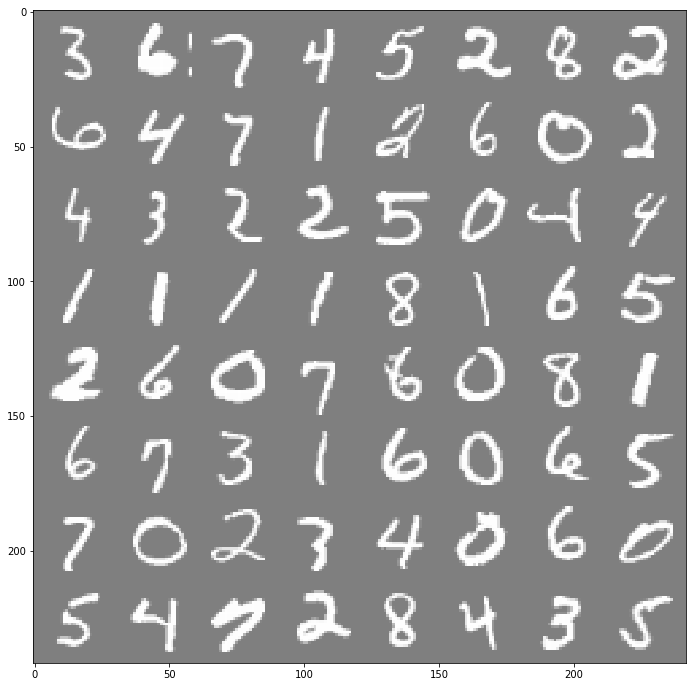

The labels are : [3 6 7 4 5 2 8 2 6 4 7 1 2 6 0 2 4 3 2 2 5 0 4 4 1 1 1 1 8 1 6 5 2 6 0 7 6
 0 8 1 6 7 3 1 6 0 6 5 7 0 2 3 4 0 6 0 5 4 7 2 8 4 3 5]


In [41]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.figure(figsize=(12, 12))
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
print('The labels are : {}'.format(labels.numpy()))

In [42]:
images.size()

torch.Size([64, 1, 28, 28])

The CNN we will be implementing has the following structure:
<img src="images/cnn.png" width="1000" height="500">

In [93]:
class CNN(nn.Module):
    """
    Convolutional neural network
    LeNet-5 consist of the following layers:
    Input size images: 28x28
    Convolution layer 1:
    Padding: Same, (input_size = output_size)
    Kernel Size = 5
    output_channels = 16
    MaxPool size = 2
    
    Conv layer 2:
    Input channels = 16
    Output channels = 32
    Kernel Size = 5
    padding = same
    MaxPool size = 2
    
    this is followed by a fully connecte layer and the last layer with 10 neurons (num_classes)
    """
    def __init__(self):
        super(CNN, self).__init__()
        #Convolutional Layer 1
        self.conv1 = nn.Sequential(
                    nn.Conv2d(in_channels=1, out_channels=16, kernel_size=5, stride=1, padding=2),
                    nn.ReLU(),
                    nn.Dropout2d(p=0.2),
                    nn.MaxPool2d(kernel_size=2))
        #Convolutional layer 2
        self.conv2 = nn.Sequential(
                    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=5, stride=1, padding=2),
                    nn.ReLU(),
                    nn.Dropout2d(p=0.2),
                    nn.MaxPool2d(kernel_size=2))
        #Fully connected layer 
        self.fc = nn.Linear(32*7*7, 10)
    def forward(self, x):
        out1 = self.conv1(x)
        out2 = self.conv2(out1)
        #now flatten the output of the second convolution layer so that we can feed into the fully connected layer
        out3 = out2.view(out2.size(0), -1)
        out = self.fc(out3)
        out_soft = F.softmax(out, dim=1)
        return out1, out2, out, out_soft

In [94]:
lr = .001
model = CNN().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [95]:
#Training
total_step = len(train_loader)
for epoch in range(nb_epoch):
    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        
        # Forward pass
        _,_,outputs, _ = model.forward(images)
        loss = criterion(outputs, labels)
        
        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            correct = 0
            total = 0
            for images1, labels1 in test_loader:
                #Load images, labels
                images1 = images1.to(device)
                labels1 = labels1.to(device)
                
                with torch.no_grad():
                    _, _, _, output  = model.forward(images1)
                    #get predictions from maxvalues
                    prediction = torch.max(output, 1)[1]
                    total+=labels1.size(0)
                    correct+=(prediction==labels1).sum()
                    accuracy = 100.0*correct.cpu().numpy()/total
            print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}, Test Accuracy: {:.4f}%' 
                   .format(epoch+1, nb_epoch, i+1, total_step, loss.item(), accuracy))

Epoch [1/5], Step [100/938], Loss: 0.2407, Test Accuracy: 89.6200%
Epoch [1/5], Step [200/938], Loss: 0.1965, Test Accuracy: 93.7400%
Epoch [1/5], Step [300/938], Loss: 0.1239, Test Accuracy: 94.9600%
Epoch [1/5], Step [400/938], Loss: 0.0779, Test Accuracy: 96.0300%
Epoch [1/5], Step [500/938], Loss: 0.0734, Test Accuracy: 96.6500%
Epoch [1/5], Step [600/938], Loss: 0.1451, Test Accuracy: 96.9600%
Epoch [1/5], Step [700/938], Loss: 0.0939, Test Accuracy: 97.1200%
Epoch [1/5], Step [800/938], Loss: 0.1434, Test Accuracy: 97.2100%
Epoch [1/5], Step [900/938], Loss: 0.0373, Test Accuracy: 97.5800%
Epoch [2/5], Step [100/938], Loss: 0.0678, Test Accuracy: 97.6700%
Epoch [2/5], Step [200/938], Loss: 0.2347, Test Accuracy: 97.0600%
Epoch [2/5], Step [300/938], Loss: 0.1503, Test Accuracy: 97.8400%
Epoch [2/5], Step [400/938], Loss: 0.1963, Test Accuracy: 98.0000%
Epoch [2/5], Step [500/938], Loss: 0.0653, Test Accuracy: 97.9000%
Epoch [2/5], Step [600/938], Loss: 0.0298, Test Accuracy: 98.1

In [79]:
with torch.no_grad():
    conv1, _, _, _ = model.forward(images)
    _, conv2, _, _ = model.forward(images)

In [80]:
conv2.size()

torch.Size([32, 32, 7, 7])

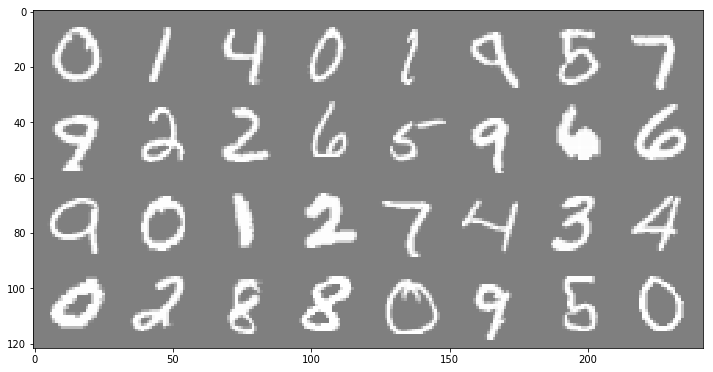

The labels are : [0 1 4 0 1 9 5 7 9 2 2 6 5 9 6 6 9 0 1 2 7 4 3 4 0 2 8 8 0 9 5 0]


In [74]:
# show images
imshow(torchvision.utils.make_grid(images.cpu()))
print('The labels are : {}'.format(labels.cpu().numpy()))

### Output of First convolutional layer

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


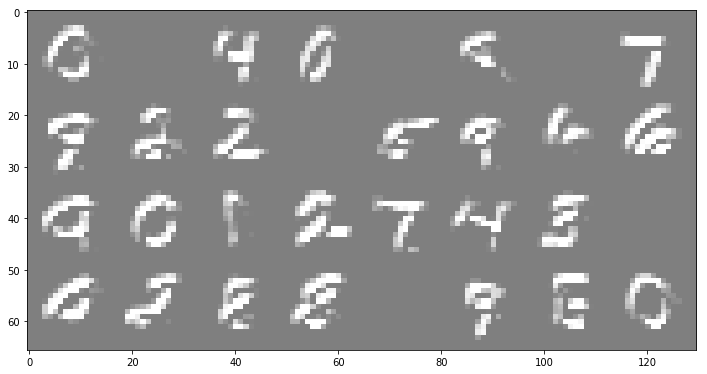

In [86]:
# show images
imshow(torchvision.utils.make_grid(conv1.cpu()[:,1,:,:].view(32, -1, 14, 14)))

### Output of Second Convolutional Network

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


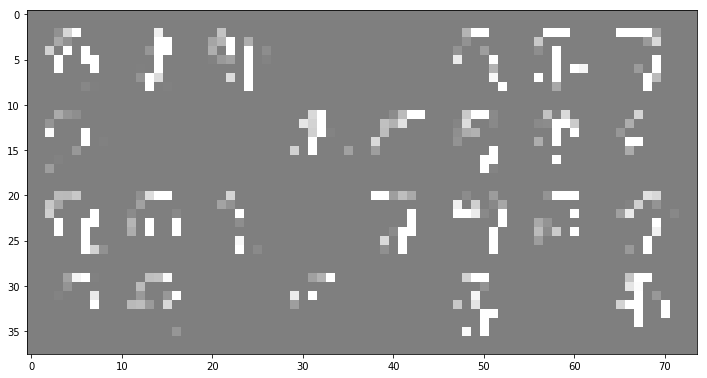

In [84]:
# show images
imshow(torchvision.utils.make_grid(conv2.cpu()[:,10,:,:].view(32, -1, 7, 7)))

Reading material:

 - https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53
 - http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf